Przykładowa sekwencja (pierwsze 5 elementów): [0.66 0.66 0.33 1.   0.66]
Suma sekwencji (cel): 9.930000000000001


D:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 348ms/step - loss: 125.9055 - mae: 11.1785 - val_loss: 130.9248 - val_mae: 11.3972
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 116.7302 - mae: 10.7681 - val_loss: 126.1154 - val_mae: 11.1848
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 116.6834 - mae: 10.7682 - val_loss: 121.3434 - val_mae: 10.9700
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 110.4354 - mae: 10.4746 - val_loss: 116.4628 - val_mae: 10.7458
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 108.1033 - mae: 10.3584 - val_loss: 111.5182 - val_mae: 10.5138
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 103.2866 - mae: 10.1153 - val_loss: 106.6124 - val_mae: 10.2783
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 96.9936 - mae: 9.8004 - val_loss: 101.8408 - val_mae: 10.0439
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 90.5749 - mae: 9.4739 - val_loss: 97.2514 - val_mae: 9.8131
Epoch 9/300
2/2 ━━━━━━━━━━━━━

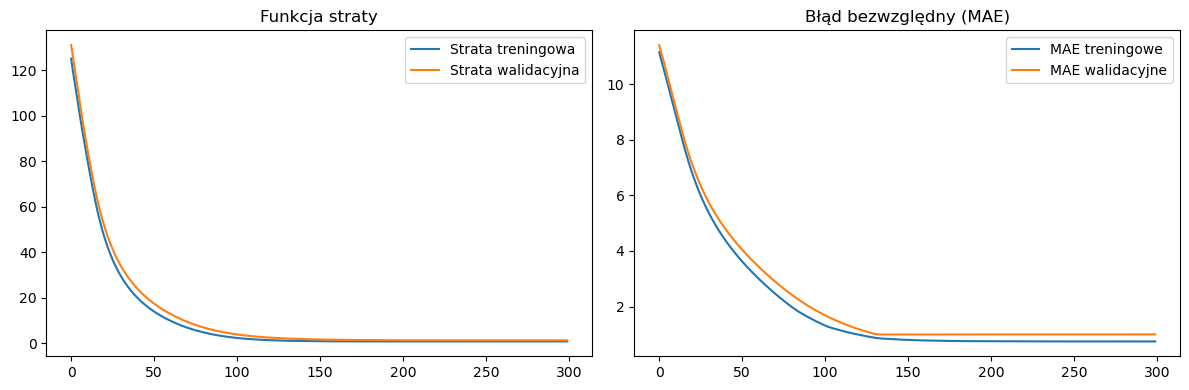


Wynik na zbiorze testowym:
Strata (MSE): 0.9621
MAE: 0.7053
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


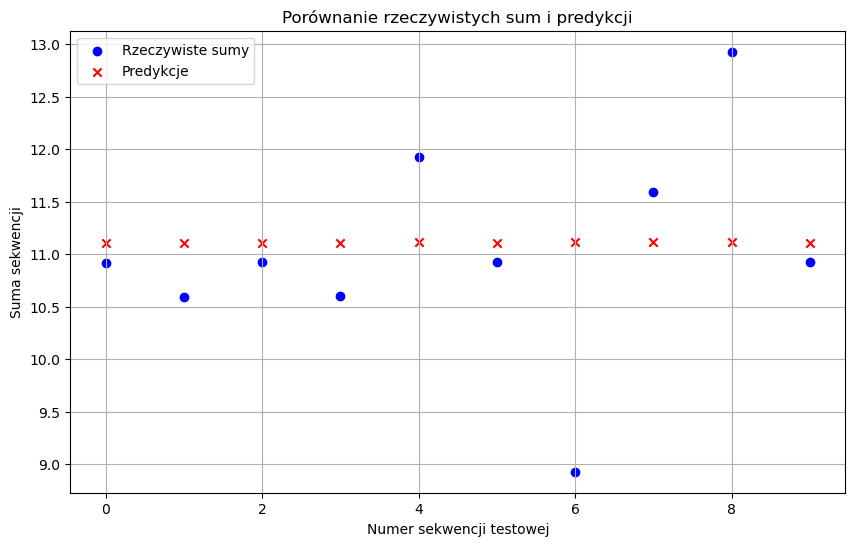

Błędy bezwzględne dla sekwencji testowych:
Sekwencja 1: 0.1912
Sekwencja 2: 0.5216
Sekwencja 3: 0.1818
Sekwencja 4: 0.5113
Sekwencja 5: 0.8141
Sekwencja 6: 0.1830
Sekwencja 7: 2.1840
Sekwencja 8: 0.4751
Sekwencja 9: 1.8152
Sekwencja 10: 0.1760

Średni błąd bezwzględny: 0.7053


In [4]:

# # Rozwiązanie zadania liniowego RNN
# 
# ## Krok 1: Import niezbędnych bibliotek
# %%
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

# %% [markdown]
# ## Krok 2: Generacja danych
# %%
# Parametry
n_sekwencji = 30
dlugosc_sekwencji = 20

# Generowanie danych wejściowych
X = np.random.rand(n_sekwencji, dlugosc_sekwencji, 1)

# Zaokrąglanie do wartości 0.33, 0.66 lub 1
zaokraglone_wartosci = np.array([0.33, 0.66, 1])
X = np.array([[zaokraglone_wartosci[np.argmin(np.abs(zaokraglone_wartosci - val))] 
              for seq in X for val in seq]]).reshape(n_sekwencji, dlugosc_sekwencji, 1)

# Obliczanie sumy dla każdej sekwencji (cele wyjściowe)
y = np.sum(X, axis=1)

# Podział na zbiór treningowy i testowy
X_train, X_test = X[:20], X[20:]
y_train, y_test = y[:20], y[20:]

print("Przykładowa sekwencja (pierwsze 5 elementów):", X_train[0].flatten()[:5])
print("Suma sekwencji (cel):", y_train[0][0])

# %% [markdown]
# ## Krok 3: Budowa modelu RNN
# %%
model = Sequential([
    SimpleRNN(32, input_shape=(dlugosc_sekwencji, 1)),  # Poprawione: dodano brakujący nawias
    Dense(1)  # Warstwa wyjściowa
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

model.summary()

# %% [markdown]
# ## Krok 4: Trenowanie modelu
# %%
history = model.fit(
    X_train,
    y_train,
    epochs=300,
    batch_size=8,
    validation_split=0.2,
    verbose=1
)

# %% [markdown]
# ## Krok 5: Wizualizacja procesu uczenia
# %%
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Strata treningowa')
plt.plot(history.history['val_loss'], label='Strata walidacyjna')
plt.title('Funkcja straty')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE treningowe')
plt.plot(history.history['val_mae'], label='MAE walidacyjne')
plt.title('Błąd bezwzględny (MAE)')
plt.legend()
plt.tight_layout()
plt.show()

# %% [markdown]
# ## Krok 6: Ocena modelu na zbiorze testowym
# %%
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"\nWynik na zbiorze testowym:\nStrata (MSE): {test_loss:.4f}\nMAE: {test_mae:.4f}")

# %% [markdown]
# ## Krok 7: Przykładowe predykcje
# %%
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, c='blue', label='Rzeczywiste sumy', marker='o')
plt.scatter(range(len(y_pred)), y_pred, c='red', label='Predykcje', marker='x')
plt.title('Porównanie rzeczywistych sum i predykcji')
plt.xlabel('Numer sekwencji testowej')
plt.ylabel('Suma sekwencji')
plt.legend()
plt.grid(True)
plt.show()

# %% [markdown]
# ## Krok 8: Analiza błędów
# %%
errors = np.abs(y_test.flatten() - y_pred.flatten())
print("Błędy bezwzględne dla sekwencji testowych:")
for i, error in enumerate(errors):
    print(f"Sekwencja {i+1}: {error:.4f}")

print(f"\nŚredni błąd bezwzględny: {np.mean(errors):.4f}")